<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/CD_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NOV 2020 PLANS

## Three peptide classes 

- AAGY (FULLY OPEN)
- ABGY (FOLDED BUT!!)
- AMV (NICELY FOLDED)


## Peptide sequences 
### Amino acid **sequence** of the L-Ala, **all-L AAGY** peptide

Ac-Ala- Ala 2-Ala-Lys-Ala- Ala 6-Lys-Ala-Lys-Ala- Ala 11-Gly-Gly-Tyr-NH2

### Amino acid **sequence** of the Nα-acetylated Aib-based, **all-L ABGY** peptide

Ac-Ala-Aib2-Ala-Lys-Ala-Aib6-Lys-Ala-Lys-Ala-Aib11-Gly-Gly-Tyr-NH2

### Amino acid sequence of its **all-L-AMV** peptide analog

Ac-Ala-AMV2-Ala-Lys-Ala- AMV6-Lys-Ala-Lys-Ala- AMV11-Gly-Gly-Tyr-NH2

## For each peptide T-variation and TFE (helix inducing solvent) variation is avialable 
## Key observation  
- AAGY and ABGY shows NO isosbestic point in water
- AAGY at higher TFE and ABGY at lower TFE shows isosbestic point
- AMV shows clear isosbestic point in all condition (water/TFE)
- Sharpness of isosbestic point enhances with 
  - increase of TFE for AAGY and ABGY
  -For AMV sharpness in isosbestic point is moderate even in only water.

## Questions asked 
We want to explore
- whether can we get any thermodynamic correlation between three states especially in water (as in drug design water is acting as only solvent) and also in TFE
- can appearance of isosbestic point and its nature of sharpness indicates/add something more in its thermodynamic parameters
- can  these three sets of peptides and their thermodynamic aspects be used as model/template for understanding the characteristics/behavior of protein system (e.g IDP, induced helical system or fully ordered).

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Let us first explore the spectral data character 
- There are two ways of reading pandas files 
- df=pd.read_excel(xlsfile,sheet_name=<sheetName>) 
- df=pd.ExcelFile(<xlsfile>) . We can find out the sheet names by df.sheet_names
- For simplicity we shall first explore all the 0% TFE data 

In [20]:
os.chdir("/content/drive/My Drive/Raja_CD/")


In [21]:
!ls *.xlsx

AMV_as_function_of_TFE_New.xlsx  AMV_Data.xlsx
AMV_Data_All.xlsx		 AMV_R1_R2_function_of_TFE_New.xlsx


# We may note that df11_amv contains the 0% TFE data for AMV 

In [22]:
os.chdir("/content/drive/My Drive/Raja_CD/")
df1_amv=pd.ExcelFile('AMV_Data_All.xlsx')
n1_amv=df1_amv.sheet_names
print(n1_amv)
df11_amv=pd.read_excel('AMV_Data_All.xlsx',sheet_name=n1_amv[0])
df11_amv # 11 stands for 0 %TFE 

['0% TFE', '10% TFE', '20% TFE', '30% TFE', 'Acetonitrile', 'Methanol']


,Wavelength,5,10,15,20,25,35,45,55
0,260.0,0.00705,0.00883,0.00908,0.00913,0.00511,0.00198,0.00700,0.00339
1,259.9,0.00952,0.01337,0.01542,0.01423,0.01638,0.01337,0.01894,0.00966
2,259.8,0.01178,0.01724,0.02103,0.01863,0.02656,0.02318,0.02966,0.01571
3,259.7,0.01386,0.02049,0.02597,0.02236,0.03572,0.03152,0.03924,0.02152
4,259.6,0.01576,0.02320,0.03028,0.02548,0.04392,0.03849,0.04775,0.02709
...,...,...,...,...,...,...,...,...,...
746,185.4,19.86155,14.95702,13.09017,11.14397,6.77257,8.40237,7.33651,4.06525
747,185.3,19.60550,14.96158,12.87344,10.98307,6.67137,8.23553,7.73747,4.16085
748,185.2,19.31594,14.96559,12.59940,10.78952,6.54669,8.07614,8.12451,4.25196
749,185.1,19.01277,14.97626,12.24852,10.59471,6.38678,7.91709,8.47293,4.32562


In [23]:
os.chdir("/content/drive/My Drive/Raja_CD/freshpep")
df1_aagy=pd.ExcelFile('AAGY_Function of temperature.xlsx')
n1_aagy=df1_aagy.sheet_names
print(n1_aagy)



['0% TFE', '20% TFE', '40% TFE', '50% TFE']


#*df11_AAGY* 0% TFE for AAGY

In [24]:
df11_aagy=pd.read_excel('AAGY_Function of temperature.xlsx',sheet_name=n1_aagy[0])
df11_aagy

,Wavelength,2C,6C,15C,25C,35C,45C
0,250.0,0.01711,0.12637,-0.01588,0.09520,0.06253,-0.06758
1,249.9,0.01649,0.12629,-0.01574,0.09492,0.06209,-0.06694
2,249.8,0.01584,0.12618,-0.01559,0.09459,0.06159,-0.06634
3,249.7,0.01517,0.12605,-0.01544,0.09418,0.06102,-0.06577
4,249.6,0.01447,0.12588,-0.01528,0.09371,0.06038,-0.06523
...,...,...,...,...,...,...,...
646,185.4,2.13429,-1.75110,-3.19901,-5.24095,-5.93852,-6.31083
647,185.3,2.04907,-1.88684,-3.30517,-5.41692,-6.08896,-6.40434
648,185.2,1.95085,-2.03674,-3.42735,-5.61157,-6.25783,-6.51295
649,185.1,1.83932,-2.20114,-3.56600,-5.82541,-6.44566,-6.63709


# df11_ABGY 0% TFE 


In [25]:
os.chdir("/content/drive/My Drive/Raja_CD/freshpep")
df1_abgy=pd.ExcelFile('ABGY_Function of temperature.xlsx')
n1_abgy=df1_abgy.sheet_names
print(n1_abgy)

df11_abgy=pd.read_excel('ABGY_Function of temperature.xlsx',sheet_name=n1_abgy[0])

df11_abgy

['0% TFE', '5% TFE', '10% TFE', '15% TFE', '30% TFE', '40% TFE']


,Unnamed: 0,5,10,15,20,25,30,35,40,45,50
0,250.0,-0.016754,0.004533,-0.024483,-0.008288,-0.011268,0.036795,0.005128,0.037262,0.036612,0.041733
1,249.9,-0.019089,0.006868,-0.023374,-0.008169,-0.010490,0.028750,0.008095,0.033068,0.031021,0.036344
2,249.8,-0.021401,0.008883,-0.022450,-0.008219,-0.009973,0.021085,0.010485,0.028929,0.025549,0.030956
3,249.7,-0.023695,0.010577,-0.021712,-0.008443,-0.009721,0.013800,0.012303,0.024835,0.020192,0.025569
4,249.6,-0.025980,0.011996,-0.021163,-0.008837,-0.009734,0.006882,0.013562,0.020797,0.014945,0.020186
...,...,...,...,...,...,...,...,...,...,...,...
596,190.4,1.515150,0.061355,-1.352510,-2.229780,-2.453280,-2.756780,-3.058800,-3.350490,-4.379660,-4.758480
597,190.3,1.423990,-0.011848,-1.350000,-2.255210,-2.473630,-2.771430,-3.071980,-3.363670,-4.391520,-4.777300
598,190.2,1.332490,-0.085151,-1.280000,-2.284010,-2.496670,-2.788010,-3.086910,-3.378600,-4.404960,-4.795990
599,190.1,1.240860,-0.158448,-1.400000,-2.312170,-2.519200,-2.804230,-3.101510,-3.393200,-4.418100,-4.814490


# Now let us have the temperature varying spectra for AMV, AAGY and ABGY 

In [26]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)

# FOR AMV 

In [27]:
T_amv=findT(df11_amv)
T_amv

array([ 5, 10, 15, 20, 25, 35, 45, 55])

## For AAGY 

In [28]:
T_aagy=findT(df11_aagy)
T_aagy


array(['2C', '6C', '15C', '25C', '35C', '45C'], dtype='<U3')

# Since the temperature is coming in a format that contains a string we have to strip the string C 

In [29]:
def tonumbers(s):
  # 20C=>20
  S=[]
  for i in s:
    S.append(int(re.search(r"\d+", i).group(0)))
  return(S)
T_aagyn=tonumbers(T_aagy)
T_aagyn

[2, 6, 15, 25, 35, 45]

## For ABGY 

In [30]:
T_abgy=findT(df11_abgy)
T_abgy # Comes in numbers - no conversion required

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Now Let us draw the spectra for each set (AMV,AAGY,ABGY)at 0% (or at 5% TFE, when 0% data is not available)  

In [31]:
def readCDT(df,T,pepname):# T must be in numbers 
  
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(['$T$ Variation in C',pepname])
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 

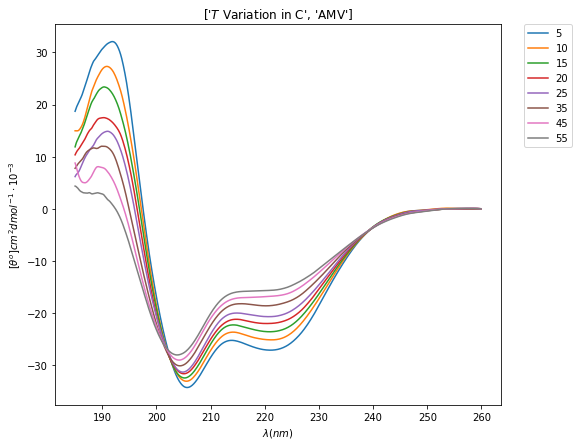

In [32]:
 T_amv,lam_amv,X_amv = readCDT(df11_amv,T_amv,'AMV')

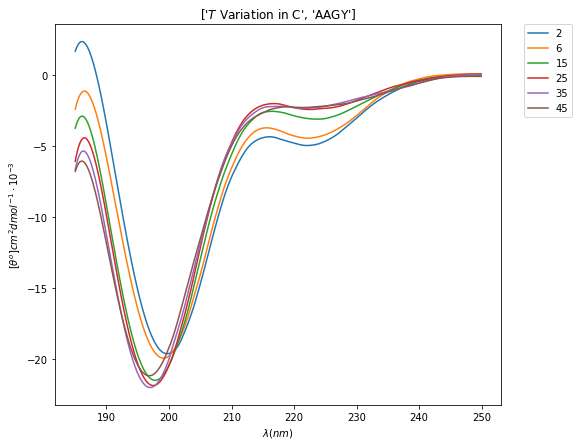

In [33]:
 T_aagy,lam_aagy_amv,X_aagy = readCDT(df11_aagy,T_aagyn,'AAGY')

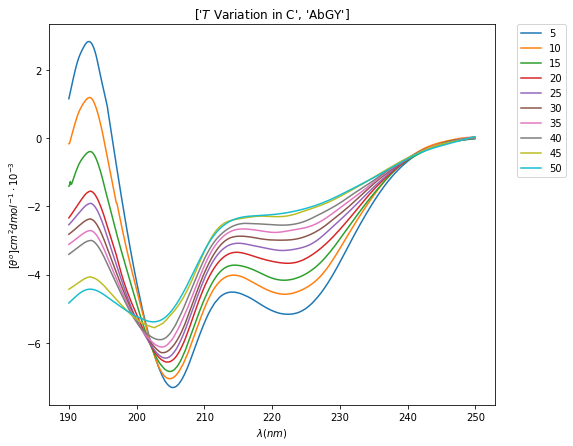

In [34]:
 T_abgy,lam_abgy_amv,X_abgy = readCDT(df11_abgy,T_abgy,'AbGY')